


# Import Library

In [1]:
import nltk
from nltk.stem import WordNetLemmatizer
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam
import json
import pickle
import numpy as np
import random
from google.colab import files

Import Data dan menginisialkan Variabel untuk membangun model

In [2]:
# Upload data.json file
uploaded = files.upload()

Saving data.json to data.json


In [3]:

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

In [4]:
# Load intents from JSON file
data_file = open('data.json').read()
intents = json.loads(data_file)

# Menyimpan Objek

In [5]:
# Initialize lists
words = []
classes = []
documents = []
ignore_words = ['?', '!']

# Membuat Data pelatihan

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:
# Process intents and patterns
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # Tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        # Add documents to the corpus
        documents.append((w, intent['tag']))
        # Add to classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# Lemmatize and lowercase words, and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# Sort classes
classes = sorted(list(set(classes)))

In [9]:
# Print information about the data
print(len(documents), "documents")
print(len(classes), "classes", classes)
print(len(words), "unique lemmatized words", words)

139 documents
61 classes ['Goodbyel', 'Goodbyep', 'Terimakasih', 'acara', 'air_terjun_tiu_kelep', 'budaya_lokal', 'cuaca', 'default', 'eror', 'fasilitas', 'greeting', 'gunung_rinjani', 'hallo', 'heyy', 'informasi_tambahan', 'keamanan', 'kuliner', 'later', 'lokasi', 'lokasi sembaluno', 'lokasi_sembalunq', 'lokasi_sembalunt', 'malam', 'mengapa sembalun', 'mengapa_sembalunl', 'pagi', 'paket_wisata', 'pengalaman', 'penginapan', 'perbatasan_sembaluna', 'perbatasan_sembaluno', 'perpisahan', 'persyaratan_pendakian', 'rekreasi', 'salam', 'sapa', 'see', 'sembalun_lawang', 'sembaluna', 'sembalune', 'sembalunr', 'siang', 'sore', 'terima_kasih', 'terimakasiha', 'terimakasihe', 'terimakasihh', 'terimakasihhh', 'thankyoui', 'thankyouo', 'thankyour', 'tinggal', 'transportasi', 'trek_pendakian', 'waktu_terbaik', 'wilayah_sembalun', 'wilayah_sembalunp', 'wilayah_sembalunr', 'wisata_lainnya', 'wisata_sembalunp', 'wisata_sembalunu']
209 unique lemmatized words [',', '.', 'a', 'acara', 'ada', 'adat', 'adm

# Membuat Arsitektur Model

In [10]:
# Save words and classes to pickle files
pickle.dump(words, open('texts.pkl', 'wb'))
pickle.dump(classes, open('labels.pkl', 'wb'))

# Training Model

In [11]:
# Create training data
training = []
output_empty = [0] * len(classes)


In [12]:
# Generate bag of words for each sentence
for doc in documents:
    bag = []
    pattern_words = doc[0]
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    
    training.append([bag, output_row])

In [13]:
# Shuffle and convert training data to numpy array
random.shuffle(training)
training = np.array(training)

<ipython-input-13-d585bf31f990>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training = np.array(training)


In [14]:
# Split training data into patterns (X) and intents (Y)
train_x = list(training[:, 0])
train_y = list(training[:, 1])

In [15]:
print("Training data created")

Training data created


#  membuat Model

In [16]:
# Create the model
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

In [17]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [18]:
import matplotlib.pyplot as plt

# Fit the model
hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)

Epoch 1/200
28/28 [==============================] - 1s 3ms/step - loss: 4.0950 - accuracy: 0.0216
Epoch 2/200
28/28 [==============================] - 0s 3ms/step - loss: 4.0437 - accuracy: 0.0504
Epoch 3/200
28/28 [==============================] - 0s 3ms/step - loss: 3.9211 - accuracy: 0.0791
Epoch 4/200
28/28 [==============================] - 0s 3ms/step - loss: 3.8317 - accuracy: 0.0647
Epoch 5/200
28/28 [==============================] - 0s 4ms/step - loss: 3.6749 - accuracy: 0.1439
Epoch 6/200
28/28 [==============================] - 0s 3ms/step - loss: 3.5444 - accuracy: 0.1511
Epoch 7/200
28/28 [==============================] - 0s 4ms/step - loss: 3.4130 - accuracy: 0.1367
Epoch 8/200
28/28 [==============================] - 0s 3ms/step - loss: 3.2102 - accuracy: 0.2230
Epoch 9/200
28/28 [==============================] - 0s 4ms/step - loss: 3.0556 - accuracy: 0.2590
Epoch 10/200
28/28 [==============================] - 0s 3ms/step - loss: 3.0163 - accuracy: 0.2806
Epoch 11/

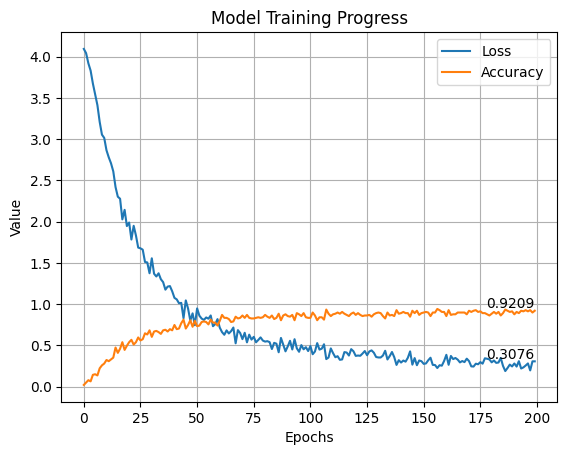

In [22]:
import matplotlib.pyplot as plt

# Plot training loss and accuracy
plt.plot(hist.history['loss'], label='Loss')
plt.plot(hist.history['accuracy'], label='Accuracy')

plt.title('Model Training Progress')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.grid(True)

# Add value annotation to the last data point of loss
plt.text(len(hist.history['loss'])-1, hist.history['loss'][-1], f'{hist.history["loss"][-1]:.4f}', ha='right', va='bottom')

# Add value annotation to the last data point of accuracy
plt.text(len(hist.history['accuracy'])-1, hist.history['accuracy'][-1], f'{hist.history["accuracy"][-1]:.4f}', ha='right', va='bottom')

plt.legend()
plt.show()


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung matriks kebingungan
confusion_mat = confusion_matrix(true_classes, predicted_classes)

# Menampilkan matriks kebingungan dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()



NameError: ignored

In [ ]:
from sklearn.metrics import classification_report

# Menghitung F1-Score, presisi, dan recall
report = classification_report(true_classes, predicted_classes)

print("Classification Report:")
print(report)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Menghitung F1-Score, Presisi, dan Recall
precision, recall, f1_score, _ = precision_recall_fscore_support(true_classes, predicted_classes)

# Membuat label kelas
class_labels = range(len(classes))

# Menampilkan F1-Score, Presisi, dan Recall dalam bentuk grafik batang
plt.figure(figsize=(5, 5))
plt.bar(class_labels, f1_score, label='F1-Score')
plt.bar(class_labels, precision, label='Precision')
plt.bar(class_labels, recall, label='Recall')
plt.xticks(class_labels, classes, rotation='vertical')
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Evaluation Metrics')
plt.legend()
plt.show()


In [ ]:
# Save the model
model.save('model.h5', hist)

Save Model

In [ ]:

print("Model created")